In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('facemask.csv')
# data guide: spreadsheet_name, spreadsheet_row and trial_number are 
# most likely things you will not be touching during your analysis
df.drop(['spreadsheet_name', 'spreadsheet_row', 'trial_number'], axis=1, inplace=True)
df

,participant_private_id,participant_device_type,participant_browser,rt,target,correct,answer,condition,fricative,minimal_pair,...,response_6_6,response_6_7,response_6_8,response_6_9,response_6_10,response_6_11,response_6_12,response_6_13,response_6_14,response_6_15
0,4373971,mobile,Mobile Safari 14.1.1,469.0,S,True,S,NM,SS,pair,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
1,4373971,mobile,Mobile Safari 14.1.1,469.0,S,True,S,NM,SS,pair,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
2,4373971,mobile,Mobile Safari 14.1.1,717.0,S,True,S,NM,SS,pair,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
3,4373971,mobile,Mobile Safari 14.1.1,717.0,S,True,S,NM,SS,pair,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
4,4373971,mobile,Mobile Safari 14.1.1,384.0,SH,False,TH,NM,TH,pair,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27195,4479252,mobile,Chrome 92.0.4515.90,500.0,TH,True,TH,NM,TH,pair,...,Agree a little,Neutral; no opinion,Neutral; no opinion,Neutral; no opinion,Disagree strongly,Neutral; no opinion,Agree strongly,Agree a little,Neutral; no opinion,Agree a little
27196,4479252,mobile,Chrome 92.0.4515.90,1272.0,SH,True,SH,NM,SH,pair,...,Agree a little,Neutral; no opinion,Neutral; no opinion,Neutral; no opinion,Disagree strongly,Neutral; no opinion,Agree strongly,Agree a little,Neutral; no opinion,Agree a little
27197,4479252,mobile,Chrome 92.0.4515.90,1272.0,SH,True,SH,NM,SH,pair,...,Agree a little,Neutral; no opinion,Neutral; no opinion,Neutral; no opinion,Disagree strongly,Neutral; no opinion,Agree strongly,Agree a little,Neutral; no opinion,Agree a little
27198,4479252,mobile,Chrome 92.0.4515.90,571.0,TH,True,TH,NM,TH,pair,...,Agree a little,Neutral; no opinion,Neutral; no opinion,Neutral; no opinion,Disagree strongly,Neutral; no opinion,Agree strongly,Agree a little,Neutral; no opinion,Agree a little


In [3]:
df.columns

Index(['participant_private_id', 'participant_device_type',
       'participant_browser', 'rt', 'target', 'correct', 'answer', 'condition',
       'fricative', 'minimal_pair', 'syllable', 'item', 'visual_cues',
       'logfreq', 'intensity', 'cog', 'vowel', 'f1', 'f2', 'loudness_accuracy',
       'mgcurk_rate', 'glasses', 'impairment', 'age', 'gender', 'country',
       'country_text', 'education', 'political', 'mask_after', 'mask_before',
       'mask_people', 'mask_perception', 'mask_spread', 'mask_freedom',
       'mask_vulnerable', 'vaccine', 'response_9_1', 'response_9_2',
       'response_9_3', 'response_9_4', 'response_9_5', 'response_9_6',
       'response_9_7', 'response_9_8', 'response_9_9', 'response_9_10',
       'response_6_1', 'response_6_2', 'response_6_3', 'response_6_4',
       'response_6_5', 'response_6_6', 'response_6_7', 'response_6_8',
       'response_6_9', 'response_6_10', 'response_6_11', 'response_6_12',
       'response_6_13', 'response_6_14', 'response_6_15'

In [4]:
sum(df.isna().values) # missing values in 'country_text' column

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0, 12800,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0])

In [5]:
# total participants: 170, number of rows for each participants: 160, shape
len(df['participant_private_id'].unique()), len(df[df['participant_private_id'] == 4373971]), df.shape

(170, 160, (27200, 62))

In [6]:
df['country_text'].unique(), len(df['country_text'].unique()) # country_text column is not standardized

(array(['The Russian Federation',
        'first 3 years of my life: Australia; then: Germany', 'Spain',
        'Armenia', 'China', nan,
        'Thailand (until the age of 11), England (from 12-21)', 'Estonia',
        'Russia', 'HONG KONG', 'Italy', 'HK', 'Brazil', 'COLOMBIA',
        'France', 'colombia', 'Finland', 'Belgium', 'Korea/US', 'Turkey',
        'spain', 'Hong Kong', 'Kasachstan', 'Romania', 'Lithuania',
        'Taiwan', 'Saudi Arabia', 'Belarus', 'The Netherlands', '1',
        'sweden', 'Portugal', 'Mexico', 'Netherlands', 'ukraine', 'Greece',
        'Ukraine', 'the Netherlands', 'Poland', 'PRC', 'Bulgaria'],
       dtype=object),
 41)

In [7]:
df['country'].unique(), len(df['country'].unique()) # too little countries compared to values of 'country_text'

(array(['Other (please specify)', 'United States', 'England', 'Germany',
        'Canada', 'Australia', 'Switzerland'], dtype=object),
 7)

In [8]:
sum(df['country_text'].isna().values) # total missing values

12800

In [9]:
df[df['country_text'].isna()]['country'].unique() # missing values of 'country_text' can be fully filled by values of 'country'

array(['United States', 'England', 'Germany', 'Canada', 'Australia',
       'Switzerland'], dtype=object)

In [10]:
#convert True False answer into 0 1
#df.replace({True:1}, inplace = True)
#df.replace({False:0}, inplace = True)

In [11]:
# fix the 'country' column
df.loc[df['country_text'] == 'Bulgaria', 'country'] = 'Bulgaria'
df.loc[df['country_text'] == 'Poland', 'country'] = 'Poland'
df.loc[df['country_text'] == 'Greece', 'country'] = 'Greece'
df.loc[df['country_text'] == 'Ukraine', 'country'] = 'Ukraine'
df.loc[df['country_text'] == 'ukraine', 'country'] = 'Ukraine'
df.loc[df['country_text'] == 'Mexico', 'country'] = 'Mexico'
df.loc[df['country_text'] == 'Portugal', 'country'] = 'Portugal'
df.loc[df['country_text'] == 'sweden', 'country'] = 'Sweden'
df.loc[df['country_text'] == '1', 'country'] = 'NaN'
df.loc[df['country_text'] == 'The Netherlands', 'country'] = 'Netherlands'
df.loc[df['country_text'] == 'the Netherlands', 'country'] = 'Netherlands'
df.loc[df['country_text'] == 'Netherlands', 'country'] = 'Netherlands'
df.loc[df['country_text'] == 'Belarus', 'country'] = 'Belarus'
df.loc[df['country_text'] == 'The Russian Federation', 'country'] = 'Russia'
df.loc[df['country_text'] == 'Russia', 'country'] = 'Russia'
df.loc[df['country_text'] == 'first 3 years of my life: Australia; then: Germany', 'country'] = 'Australia, Germany'
df.loc[df['country_text'] == 'Spain', 'country'] = 'Spain'
df.loc[df['country_text'] == 'spain', 'country'] = 'Spain'
df.loc[df['country_text'] == 'Armenia', 'country'] = 'Armenia'
df.loc[df['country_text'] == 'China', 'country'] = 'China'
df.loc[df['country_text'] == 'PRC', 'country'] = 'China'
df.loc[df['country_text'] == 'Thailand (until the age of 11), England (from 12-21)', 'country'] = 'England, Thailand'
df.loc[df['country_text'] == 'Estonia', 'country'] = 'Estonia'
df.loc[df['country_text'] == 'HONG KONG', 'country'] = 'Hong Kong'
df.loc[df['country_text'] == 'Hong Kong', 'country'] = 'Hong Kong'
df.loc[df['country_text'] == 'HK', 'country'] = 'Hong Kong'
df.loc[df['country_text'] == 'Italy', 'country'] = 'Italy'
df.loc[df['country_text'] == 'Brazil', 'country'] = 'Brazil'
df.loc[df['country_text'] == 'COLOMBIA', 'country'] = 'Colombia'
df.loc[df['country_text'] == 'colombia', 'country'] = 'Colombia'
df.loc[df['country_text'] == 'France', 'country'] = 'France'
df.loc[df['country_text'] == 'Finland', 'country'] = 'Finland'
df.loc[df['country_text'] == 'Belgium', 'country'] = 'Belgium'
df.loc[df['country_text'] == 'Korea/US', 'country'] = 'Korea, United States'
df.loc[df['country_text'] == 'Turkey', 'country'] = 'Turkey'
df.loc[df['country_text'] == 'Kasachstan', 'country'] = 'Kazakhstan'
df.loc[df['country_text'] == 'Romania', 'country'] = 'Romania'
df.loc[df['country_text'] == 'Lithuania', 'country'] = 'Lithuania'
df.loc[df['country_text'] == 'Taiwan', 'country'] = 'Taiwan'
df.loc[df['country_text'] == 'Saudi Arabia', 'country'] = 'Saudi Arabia'

In [12]:
df['country'].unique() # after fix, there is still 1 participant without known country (NaN)

array(['Russia', 'Australia, Germany', 'Spain', 'Armenia', 'China',
       'United States', 'England, Thailand', 'England', 'Germany',
       'Estonia', 'Hong Kong', 'Italy', 'Brazil', 'Colombia', 'France',
       'Finland', 'Belgium', 'Korea, United States', 'Canada', 'Turkey',
       'Australia', 'Kazakhstan', 'Romania', 'Lithuania', 'Taiwan',
       'Saudi Arabia', 'Belarus', 'Netherlands', 'NaN', 'Sweden',
       'Portugal', 'Mexico', 'Ukraine', 'Greece', 'Poland', 'Switzerland',
       'Bulgaria'], dtype=object)

In [13]:
# now, we can drop 'country_text' without losing information 
df.drop(['country_text'], axis=1, inplace=True)

In [14]:
# data guide: fricative is just like target. You can ignore it. 
# You can also ignore minimal_pair for the scope of this work.
df.drop(['fricative', 'minimal_pair'], axis=1, inplace=True)

In [15]:
df[df['participant_private_id'] == 4373971]

,participant_private_id,participant_device_type,participant_browser,rt,target,correct,answer,condition,syllable,item,...,response_6_6,response_6_7,response_6_8,response_6_9,response_6_10,response_6_11,response_6_12,response_6_13,response_6_14,response_6_15
0,4373971,mobile,Mobile Safari 14.1.1,469.0,S,True,S,NM,onset,sigh,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
1,4373971,mobile,Mobile Safari 14.1.1,469.0,S,True,S,NM,onset,sigh,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
2,4373971,mobile,Mobile Safari 14.1.1,717.0,S,True,S,NM,coda,mess,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
3,4373971,mobile,Mobile Safari 14.1.1,717.0,S,True,S,NM,coda,mess,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
4,4373971,mobile,Mobile Safari 14.1.1,384.0,SH,False,TH,NM,onset,thin,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18635,4373971,mobile,Mobile Safari 14.1.1,412.0,SH,True,SH,WM,onset,shy,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
18636,4373971,mobile,Mobile Safari 14.1.1,540.0,SH,True,SH,WM,onset,shoal,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
18637,4373971,mobile,Mobile Safari 14.1.1,540.0,SH,True,SH,WM,onset,shoal,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
18638,4373971,mobile,Mobile Safari 14.1.1,931.0,S,False,TH,WM,onset,thigh,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little


In [16]:
df['rt'].describe(), df[df['rt'] > 100000]['rt'] # outliers: rt > 100000, extremely high reaction time?

(count     27200.000000
 mean       1154.181561
 std        5989.125772
 min           3.000000
 25%         515.900000
 50%         734.350000
 75%        1166.000000
 max      561241.000000
 Name: rt, dtype: float64,
 10646    206783.2
 10647    206783.2
 14598    291833.8
 14599    291833.8
 23076    561241.0
 23077    561241.0
 Name: rt, dtype: float64)

In [17]:
# EDA 2: nobody recognizes the sound 'X' correctly, 932 test for 'X', total accuracy: 82.69%
df['target'].unique(), df['answer'].unique(), sum(df['target'] == 'X'), sum(df['target'] == df['answer']), sum(df['correct']), sum(df['correct'])/df.shape[0]

(array(['S', 'SH', 'F', 'TH', 'X'], dtype=object),
 array(['S', 'TH', 'SH', 'F'], dtype=object),
 932,
 22492,
 22492,
 0.8269117647058823)

(<AxesSubplot:>,
 count     27200
 unique       40
 top        sore
 freq        680
 Name: item, dtype: object,
 array(['sigh', 'mess', 'thin', 'soul', 'shore', 'oaf', 'loath', 'thaw',
        'ruth', 'ass', 'wreath', 'mesh', 'thought', 'foal', 'deaf', 'shin',
        'shoal', 'lease', 'sore', 'sought', 'thole', 'roof', 'fie',
        'plush', 'loaf', 'thigh', 'leash', 'reef', 'shy', 'fought', 'four',
        'oath', 'sin', 'push', 'ash', 'short', 'puss', 'death', 'fin',
        'plus'], dtype=object))

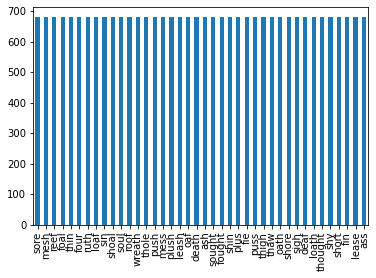

In [18]:
# 'item' is uniform distributed (freq=680 each word)
df['item'].value_counts().plot(kind='bar'), df['item'].describe(), df['item'].unique()

In [19]:
df[['item', 'target', 'answer']].drop_duplicates().sort_values(by=['target', 'item'])[:30]

,item,target,answer
10318,ash,F,SH
572,deaf,F,F
3946,death,F,TH
44,fie,F,F
76,fin,F,F
26,foal,F,F
58,fought,F,F
60,four,F,F
10250,leash,F,SH
48,loaf,F,F


In [20]:
df[['item', 'logfreq']].drop_duplicates().sort_values(by=['logfreq'])

,item,logfreq
40,thole,1.54
44,fie,2.47
12,loath,2.69
10,oaf,2.70
46,plush,2.98
32,shoal,3.04
52,leash,3.12
72,puss,3.12
26,foal,3.15
14,thaw,3.27


In [21]:
df[['item', 'logfreq', 'rt']].drop_duplicates().groupby(by=['item']).mean().sort_values(by=['rt'])
#The higher logfreq of a word, the lower the reaction time is

,logfreq,rt
item,,
mesh,3.27,806.436160
plus,4.78,824.606786
push,4.92,860.721246
mess,4.79,872.378750
short,5.13,875.891310
shy,4.27,876.689926
thought,5.84,882.627545
leash,3.12,893.507746
ash,4.19,918.624985


In [22]:
df['logfreq'].describe()

count    27200.000000
mean         3.879500
std          0.877652
min          1.540000
25%          3.270000
50%          3.870000
75%          4.472500
max          5.840000
Name: logfreq, dtype: float64

## Distribution plot of logfreq, reaction time (outliers removed), intensity, cog, f1, f2 and mask related variables

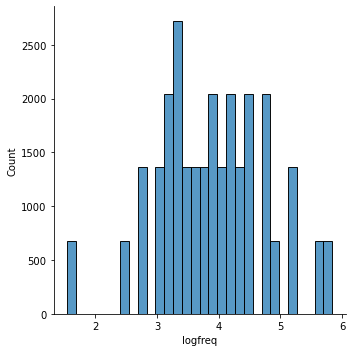

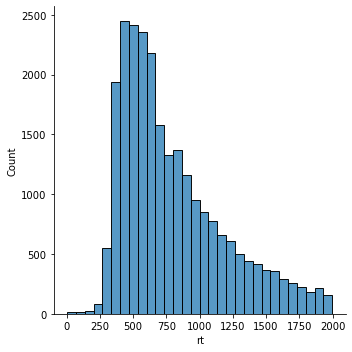

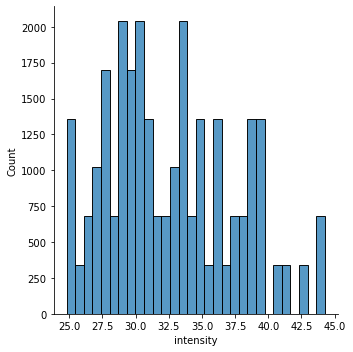

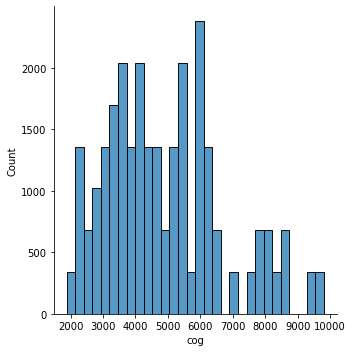

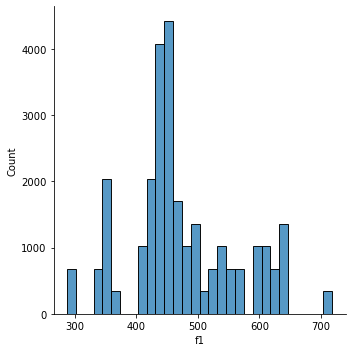

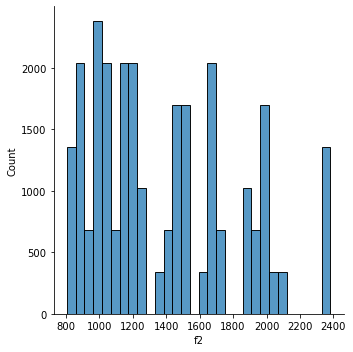

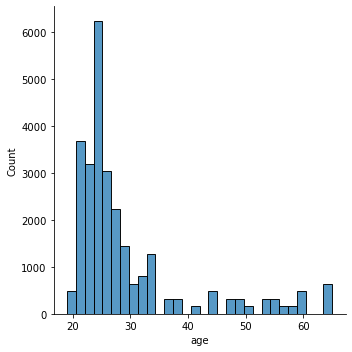

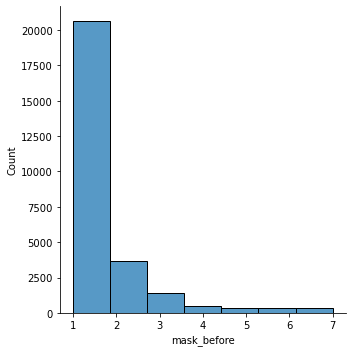

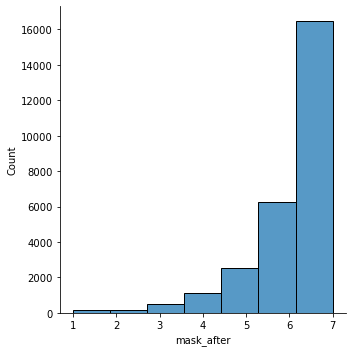

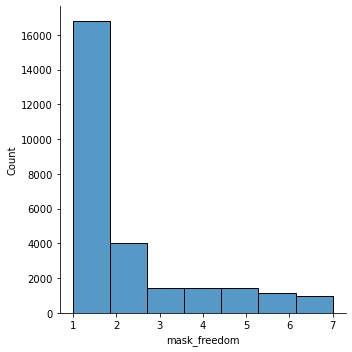

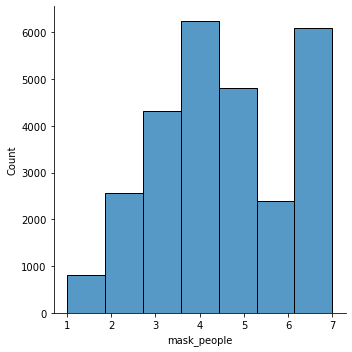

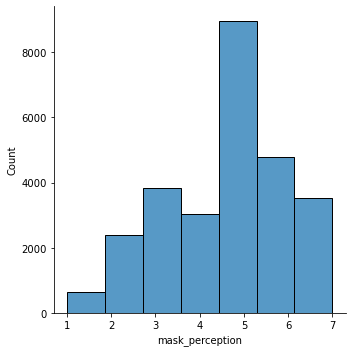

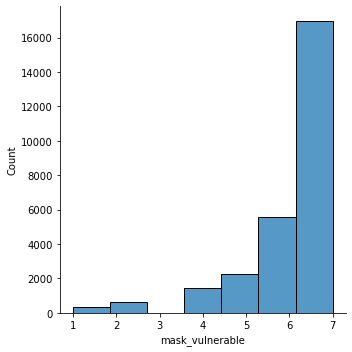

In [23]:
sns.displot(df['logfreq'], bins = 30)
sns.displot(df[df['rt'] < 2000]['rt'], bins = 30)
sns.displot(df['intensity'], bins = 30)
sns.displot(df['cog'], bins = 30)
sns.displot(df['f1'], bins = 30)
sns.displot(df['f2'], bins = 30)
sns.displot(df['age'], bins = 30)
sns.displot(df['mask_before'], bins = 7)
sns.displot(df['mask_after'], bins = 7)
sns.displot(df['mask_freedom'], bins = 7)
sns.displot(df['mask_people'], bins = 7)
sns.displot(df['mask_perception'], bins = 7)
sns.displot(df['mask_vulnerable'], bins = 7)


## react time vs condition and f1

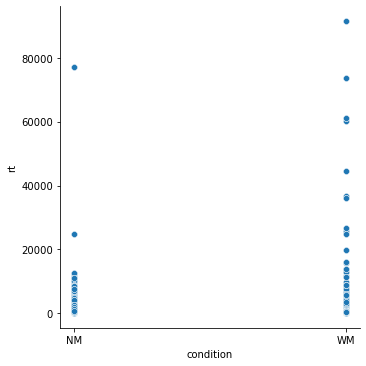

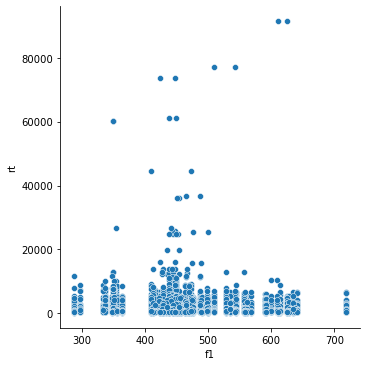

In [27]:
sns.relplot(data = df[df['rt'] < 100000], x = 'condition', y = 'rt')
sns.relplot(data = df[df['rt'] < 100000], x = 'f1', y = 'rt')

## Relations between some varibles specified by condition or result of test

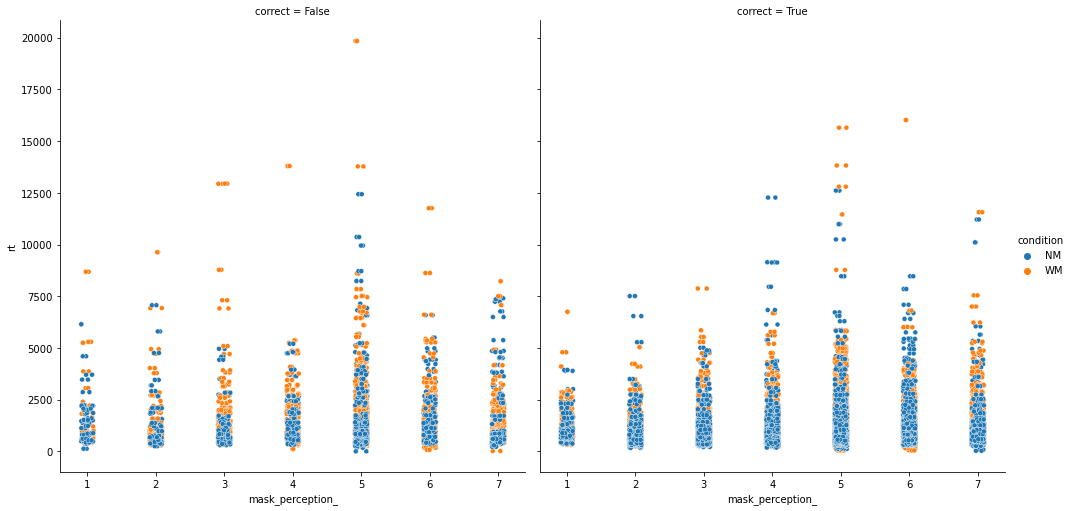

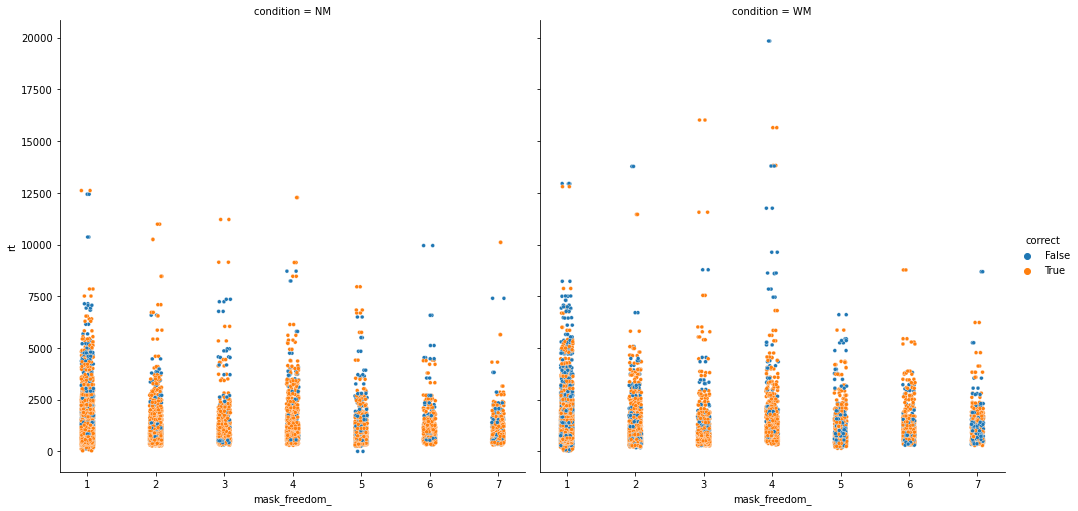

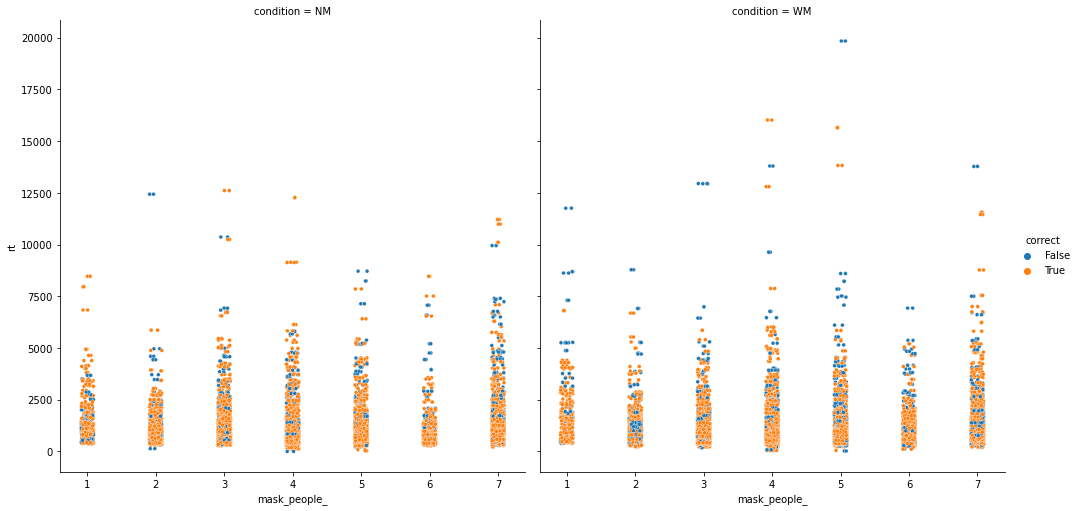

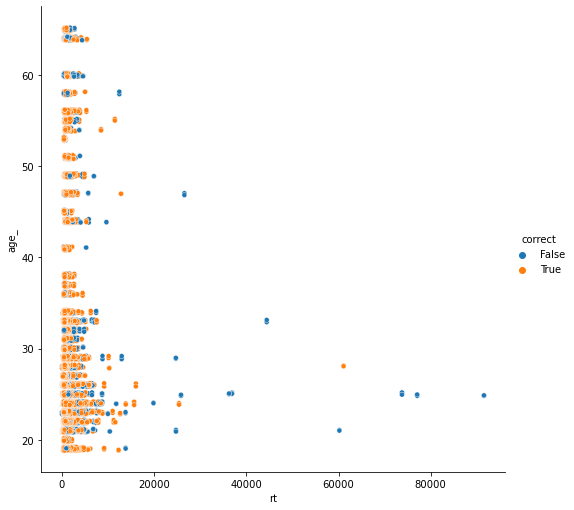

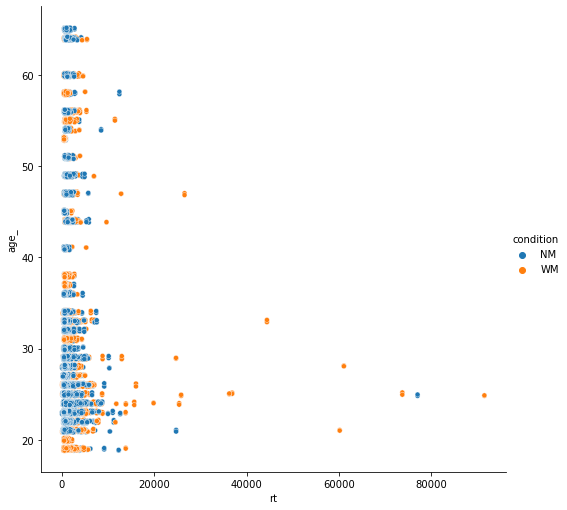

In [28]:
#This is for x_jitter as built in jitter function does not work
df['mask_perception_'] = df['mask_perception'] + np.random.uniform(-0.09,0.09, len(df))
#mask_perception vs rt
sns.relplot(data=df[(df['rt'] < 20000)], x="mask_perception_", y="rt", col="condition", 
            hue="correct", kind="scatter", height = 7, s = 25)

#mask_freedom vs rt
df['mask_freedom_'] = df['mask_freedom'] + np.random.uniform(-0.09,0.09, len(df))
sns.relplot(data=df[(df['rt'] < 20000)], x="mask_freedom_", y="rt", col="condition", 
            hue="correct", kind="scatter", height = 7, s = 15)

#mask_people vs rt
df['mask_people_'] = df['mask_people'] + np.random.uniform(-0.09,0.09, len(df))
sns.relplot(data=df[(df['rt'] < 20000)], x="mask_people_", y="rt", col="condition", 
            hue="correct", kind="scatter", height = 7, s = 15)
#age
df['age_'] = df['age'] + np.random.uniform(-0.2,0.2, len(df))
sns.relplot(data=df[df['rt'] < 100000], x="rt", y="age_", 
            hue="correct", kind="scatter", s=25, height = 7)
sns.relplot(data=df[df['rt'] < 100000], x="rt", y="age_", 
            hue="condition", kind="scatter", s=25, height = 7)

df.drop(columns = ['mask_freedom_','mask_perception_','mask_people_', 'age_'], inplace = True)